In [2]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext()

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.types import *
from datetime import datetime

# counterpoint_data = sc.textFile('../DataMining/Export.csv')
# print(counterpoint_data.collect())


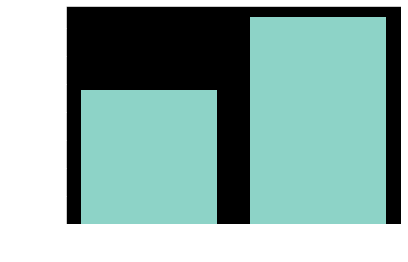

In [3]:
df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load('Export.csv')
df.registerTempTable('tempTable')

totalPerYear = []

for i in range(2):
    Year = 2015 + i
    statement = "SELECT SUM (`Gemiddeld aantal fietsers`) AS `totaal` FROM tempTable WHERE Jaar =" + str(Year)
    bikeData = sqlContext.sql(statement).collect()
    totalPerYear.append(bikeData[0][0])

%matplotlib inline
import matplotlib.pyplot as plt

years = ["2015", "2016"]
data = [totalPerYear[0], totalPerYear[1]]

plt.ylabel("Aantal Fietsers")
plt.xlabel("Jaar")
plt.bar(years, data)

plt.show()      

In [41]:
import folium

A_COOR = (51.2171918, 4.4212529)

df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', delimiter=";").load('Locations.csv')
df.registerTempTable("locationTable")
df.printSchema()

statement = "SELECT * FROM locationTable"
locations = sqlContext.sql(statement).collect()

map = folium.Map(location=A_COOR, zoom_start=13)
for coor in locations:
    lat = coor[1]
    longi = coor[2]
    folium.Marker(
        [lat, longi],
        clustered_marker = True
    ).add_to(map)

display(map)

root
 |-- code fietstelpunt: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)

